In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
with open('prm_multigoal_experiment.json') as f:
    df = pd.json_normalize(json.load(f))
    
df = df.rename(columns={'planner_params.samples_per_goal':'k','planner_params.optimize_segments':'opt','planner_params.prm_build_time':'prm_time'})
df['length_per_target'] = df['final_path_length'] / df['goals_visited']
df.columns

df.head()

,final_path_length,goals_visited,planner_name,run_time,start_state,opt,prm_time,k,length_per_target
0,703.599061,144,Multigoal PRM*,18.581165,3,True,2,2,4.886105
1,688.441887,157,Multigoal PRM*,51.275382,8,True,2,4,4.384980
2,609.504437,164,Multigoal PRM*,98.889874,5,True,1,6,3.716490
3,620.761896,164,Multigoal PRM*,127.788458,6,True,2,6,3.785134
4,622.148446,162,Multigoal PRM*,140.136094,8,True,1,7,3.840423


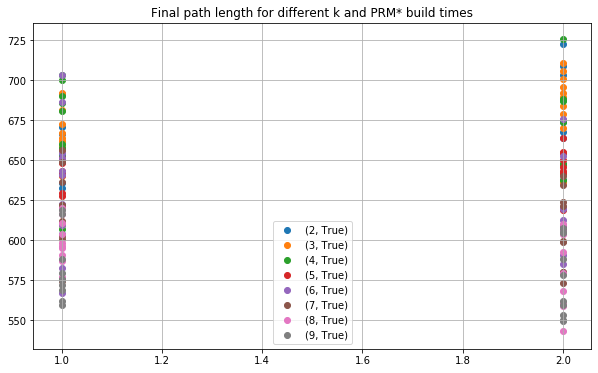

In [3]:
plt.figure(figsize=(10,6))
plt.title('Final path length for different k and PRM* build times')

for (k,group) in df.groupby(['k','opt']):
    plt.scatter(group['prm_time'], group['final_path_length'], label=str(k))

plt.grid()
plt.legend()

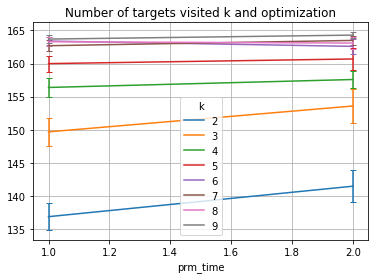

In [4]:
agg_goals = df.groupby(['prm_time','k'])['goals_visited']\
    .agg(['mean','sem'])\
    .unstack(level='k')

agg_goals['sem'] *= 1.96

agg_goals.plot(
    y='mean', 
    yerr='sem', 
    capsize=3, 
    title='Number of targets visited k and optimization', 
    figsize=(6,4)
)

plt.grid()
# plt.ylim(0,160)

plt.savefig('figures/goals_visited_vs_settings.pdf')

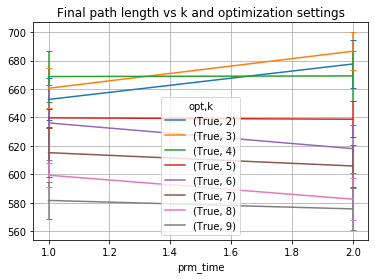

In [5]:
agg_time = df.groupby(['prm_time','k','opt'])['final_path_length']\
    .agg(['mean','sem'])\
    .unstack(level=['opt','k'])

agg_time['sem'] *= 1.96

agg_time.plot(y='mean', 
              yerr='sem', 
              capsize=3, 
              title='Final path length vs k and optimization settings', 
              figsize=(6,4))

plt.grid()
# plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('figures/path_length_vs_settings.pdf')

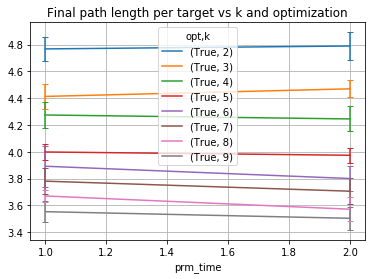

In [6]:
agg_lpt = df.groupby(['prm_time','k','opt'])['length_per_target']\
    .agg(['mean','sem'])\
    .unstack(level=['opt','k'])

agg_lpt['sem'] *= 1.96

agg_lpt.plot(y='mean', 
              yerr='sem', 
              capsize=3, 
              title='Final path length per target vs k and optimization', 
              figsize=(6,4))

plt.grid()
# plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('figures/path_length_per_target_vs_settings.pdf')

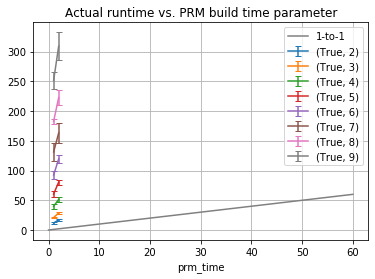

In [7]:
agg_df = df.groupby(['prm_time','k','opt'])['run_time']\
    .agg(['mean','sem'])\
    .unstack(level=['opt','k'])

agg_df['sem'] *= 1.96

agg_df.plot(y='mean', yerr='sem', capsize=3, title='Actual runtime vs. PRM build time parameter', figsize=(6,4))

plt.plot([0,60],[0,60], label='1-to-1', color='gray')

plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('figures/runtime_vs_time_parameter.pdf')

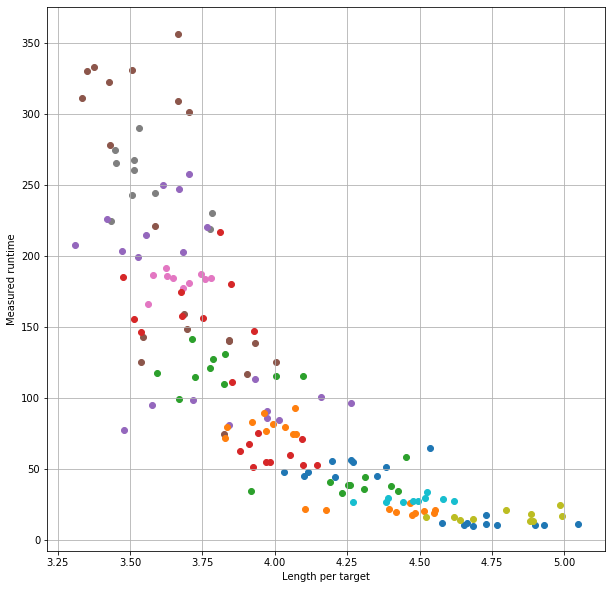

In [8]:
plt.figure(figsize=(10,10))

for params, group_df in df[df['opt']].groupby(['prm_time','k']):
    plt.scatter(x=group_df['length_per_target'], y=group_df['run_time'], label=str(params))

plt.xlabel('Length per target')    
plt.ylabel('Measured runtime')    

plt.grid()

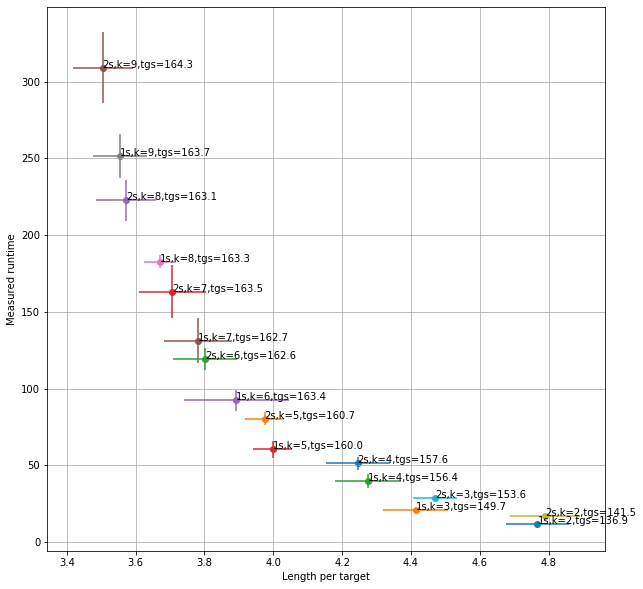

In [9]:
plt.figure(figsize=(10,10))

for (t,k), group_df in df[df['opt']].groupby(['prm_time','k']):
    x,xerr = group_df['length_per_target'].agg(['mean', 'sem'])
    y,yerr = group_df['run_time'].agg(['mean', 'sem'])
    tgs = group_df['goals_visited'].mean()
    plt.scatter(x=x, y=y)
    plt.errorbar(x=x, xerr=xerr*1.96, y=y, yerr=yerr*1.96)
    plt.annotate('{}s,k={},tgs={}'.format(t,k,tgs), (x,y))

plt.xlabel('Length per target')    
plt.ylabel('Measured runtime')    

plt.grid()

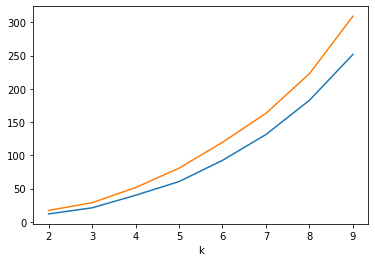

In [10]:
for t, group_df in df[df['opt']].groupby(['prm_time']):
    group_df.groupby('k')['run_time'].mean().plot()

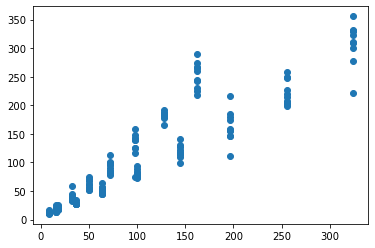

In [26]:
plt.scatter(x=(df['prm_time']*2) * df['k']**2, y=df['run_time'])